In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

## Attributing causes to deforestation worldwide
Curtis et al. Science 2018 used a decision tree classification system to attribute the causes of deforestation for 10 km x 10 km cells. The model has low accuracy for classifying loss due to urbanization, but this is a minor contributor to the total tree cover loss. All other accuracies were > 80% based on the SI. Data are given for the 2001-2015 study period. 

I am a little bit skeptical of this study because the model code is a single file uploaded as a supplementary text file, most of the input data is not included in the paper, and the output is given as tables pasted into word for no apparent reason. Nonetheless, I have not been able to find a better resource for this particular problem. 

In [2]:
tc_loss_causes_df = pd.read_excel('data/060120_curtis2018_deforestation_classes.xlsx', na_values=['<1%'], index_col=0)
tc_loss_causes_df

,hansen_tc_loss_MHa_2001_2015,hansen_pct_tc_loss_2001_2015,curtis_pct_deforestation,curtis_pct_deforestation_CI,curtis_pct_shifting_ag,curtis_pct_shifting_ag_CI,curtis_pct_forestry,curtis_pct_forestry_CI,curtis_pct_wildfire,curtis_pct_wildfire_CI,curtis_pct_urbanization,curtis_pct_urbanization_CI
region,,,,,,,,,,,,
North America,70,0.21,0.02,0.01,0.01,0.01,0.48,0.11,0.48,0.11,0.01,0.01
Latin America,78,0.25,0.64,0.08,0.24,0.07,0.09,0.03,NaN,NaN,NaN,NaN
Europe,15,0.05,0.00,0.00,NaN,NaN,0.95,0.05,0.05,0.05,0.00,0.00
Africa,39,0.13,0.02,0.01,0.93,0.03,0.04,0.02,NaN,NaN,0.01,0.02
Russia/China/South Asia,64,0.20,0.02,0.02,0.01,0.01,0.38,0.12,0.59,0.12,NaN,NaN
Southeast Asia,39,0.13,0.61,0.13,0.20,0.10,0.14,0.06,0.02,0.06,NaN,NaN
Australia/Oceania,10,0.03,0.08,0.06,0.10,0.04,0.19,0.09,0.62,0.14,0.01,NaN
Global,314,1.00,0.27,0.05,0.24,0.03,0.26,0.04,0.23,0.04,0.01,NaN


## Crude estimation of the human-attributable fraction of deforestation

The spreadsheet specified the dimensionless number as follows "Area of Forestland Lost to Lumber Operation / Area of Forestland Lost to Natural Causes (Fire/Flood/Invasive Species)." However, this number is not so well specified. Some questions arise:

* What is forestland? What percent tree cover should be considered forest? 
* Are we specifically interested in losses due to lumber operations? Or any human-attributable losses of tree cover. 

Lumber operations are far from the only human-attributable cause of tree-cover loss. Other causes include

* Urbanization - i.e. replacement of forests with human habitation (dwellings, factories, malls, etc.)
* Agriculture - farmland can displace forest. In some places, clearing is frequent. 
* Forestry - conversion of wild forest into cultivated growth for intermittent logging. 

Here I will calculate the fraction of total tree cover loss that is due to human-attributable causes. In contrast to the several human-attributable causes listed above, there is apparently only one major natural cause of tree cover loss: wildfire. Although many wildfires are due in some ways to human causes (e.g. started by humans, caused to some degree by long term mismanagement) for the purposes of this calculation we will treat fire as a natural cause. Given this, the deforestation number should equal "Tree-covered area lost to human attributable causes / area lost to wildfire." The calculation is below.

Urbanization, it turns out, is a very small source of tree cover loss (≈1% of total). You might argue shifting agriculture and managed forestry could be associated with future regrowth of forest and should therefore be omitted from the calculation. Omitting these (i.e. calculating (urbanization + deforestation) / fire) gives a lower bound on the "deforestation number." This calculation is also below. 

In [3]:
# Crude calculation without CIs. 
loss_MHa = tc_loss_causes_df['hansen_tc_loss_MHa_2001_2015']
curtis_only_df = tc_loss_causes_df.drop(['hansen_tc_loss_MHa_2001_2015', 'hansen_pct_tc_loss_2001_2015'], axis=1)
curtis_global = curtis_only_df.loc['Global']

human_attributable = ['curtis_pct_deforestation', 'curtis_pct_shifting_ag', 'curtis_pct_forestry', 'curtis_pct_urbanization'] 
human_attributable_total_MHa = curtis_only_df[human_attributable].multiply(loss_MHa, axis=0).sum(axis=1)

permanent_human_attributable = ['curtis_pct_deforestation', 'curtis_pct_urbanization'] 
permanent_human_attributable_total_MHa = curtis_only_df[permanent_human_attributable].multiply(loss_MHa, axis=0).sum(axis=1)
wildfire_MHa = curtis_only_df['curtis_pct_wildfire'] * loss_MHa

crude_deforestation_number = human_attributable_total_MHa / wildfire_MHa
crude_perm_deforestation_number = permanent_human_attributable_total_MHa / wildfire_MHa
print('Estimated losses to human-attributable causes 2001-2015')
print(human_attributable_total_MHa)
print('Estimated permanent losses to human-attributable causes 2001-2015')
print(permanent_human_attributable_total_MHa)
print('Estimated losses to wildfire 2001-2015:')
print(wildfire_MHa)
print()

print('Ratio of tree-covered area lost to all human attributable causes / area lost to wildfire:')
print(crude_deforestation_number)
print('Ratio of tree-covered area permanently lost to all human attributable causes / area lost to wildfire:')
print(crude_perm_deforestation_number)

Estimated losses to human-attributable causes 2001-2015
region
North America               36.40
Latin America               75.66
Europe                      14.25
Africa                      39.00
Russia/China/South Asia     26.24
Southeast Asia              37.05
Australia/Oceania            3.80
Global                     244.92
dtype: float64
Estimated permanent losses to human-attributable causes 2001-2015
region
North America               2.10
Latin America              49.92
Europe                      0.00
Africa                      1.17
Russia/China/South Asia     1.28
Southeast Asia             23.79
Australia/Oceania           0.90
Global                     87.92
dtype: float64
Estimated losses to wildfire 2001-2015:
region
North America              33.60
Latin America                NaN
Europe                      0.75
Africa                       NaN
Russia/China/South Asia    37.76
Southeast Asia              0.78
Australia/Oceania           6.20
Global              

In [4]:
# Can do a sampling within the 95% confidence intervals. 
# Qn - possible to do this "on one leg"?
# Should also do in carbon units. Will be pretty different I'd guess.

In [5]:
# Convert 95% CI into standard deviation by assuming normal distribution.
# Given this assumption, sigma = 95% interval / 1.96
# When not explicitly given, use 0.5% error since these values were noted as "<1%" in Curtis et al.
all_causes = human_attributable +  ['curtis_pct_wildfire']

for cause in all_causes:
    CI_name = cause + '_CI'
    CI_95 = curtis_global.get(CI_name)
    
    if np.isnan(CI_95):
        CI_95 = 0.005
    
    sigma = CI_95 / 1.96
    sigma_name = cause + '_sigma'
    curtis_global[sigma_name] = sigma
    
curtis_global

curtis_pct_deforestation          0.270000
curtis_pct_deforestation_CI       0.050000
curtis_pct_shifting_ag            0.240000
curtis_pct_shifting_ag_CI         0.030000
curtis_pct_forestry               0.260000
curtis_pct_forestry_CI            0.040000
curtis_pct_wildfire               0.230000
curtis_pct_wildfire_CI            0.040000
curtis_pct_urbanization           0.010000
curtis_pct_urbanization_CI             NaN
curtis_pct_deforestation_sigma    0.025510
curtis_pct_shifting_ag_sigma      0.015306
curtis_pct_forestry_sigma         0.020408
curtis_pct_urbanization_sigma     0.002551
curtis_pct_wildfire_sigma         0.020408
Name: Global, dtype: float64

In [6]:
n = int(1e5)
deforestation_samples = np.random.normal(
    loc=curtis_global.curtis_pct_deforestation, 
    scale=curtis_global.curtis_pct_deforestation_sigma,
    size=n)
shifting_ag_samples = np.random.normal(
    loc=curtis_global.curtis_pct_shifting_ag, 
    scale=curtis_global.curtis_pct_shifting_ag_sigma,
    size=n)
forestry_samples = np.random.normal(
    loc=curtis_global.curtis_pct_forestry, 
    scale=curtis_global.curtis_pct_forestry_sigma,
    size=n)
urbanization_samples = np.random.normal(
    loc=curtis_global.curtis_pct_urbanization, 
    scale=curtis_global.curtis_pct_urbanization_sigma,
    size=n)
wildfire_samples = np.random.normal(
    loc=curtis_global.curtis_pct_wildfire, 
    scale=curtis_global.curtis_pct_wildfire_sigma,
    size=n)

deforestation_estimates = (
    deforestation_samples + shifting_ag_samples + forestry_samples + urbanization_samples)
deforestation_estimates /= wildfire_samples

perm_deforestation_estimates = (deforestation_samples + urbanization_samples) 
perm_deforestation_estimates /= wildfire_samples

2.8138720247912974 3.3899952584948876 4.173511891552031
0.9435809527146899 1.2175831415930176 1.5647756387654892


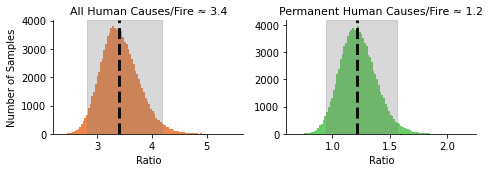

In [7]:
# Make an estimation plot for both the above-calculated ratios.
# Plot shows the posterior distribution of estimates, the median and middle 95% (grey box).
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(7, 2.5))
pal = sns.color_palette('muted')

ax0.hist(deforestation_estimates, bins=100, color=pal[1])
low, median_est, high = np.percentile(deforestation_estimates, [2.5, 50, 97.5])
print(low, median_est, high)
ax0.axvspan(low, high, color='grey', alpha=0.3)
ax0.axvline(median_est, ls='--', lw=3, color='k', alpha=0.9)

ax0.set_title('All Human Causes/Fire ≈ %.1f' % median_est, fontsize=11)
ax0.set_xlabel('Ratio', fontsize=10)
ax0.set_ylabel('Number of Samples', fontsize=10)
sns.despine(ax=ax0)

ax1.hist(perm_deforestation_estimates, bins=100, color=pal[2])
low, median_est, high = np.percentile(perm_deforestation_estimates, [2.5, 50, 97.5])
print(low, median_est, high)
ax1.axvspan(low, high, color='grey', alpha=0.3)
ax1.axvline(median_est, ls='--', lw=3, color='k', alpha=0.9)
ax1.set_title('Permanent Human Causes/Fire ≈ %.1f' % median_est, fontsize=11)
ax1.set_xlabel('Ratio', fontsize=10)
sns.despine(ax=ax1)

plt.tight_layout()
plt.savefig('figs/area_ratio_estimation.png', dpi=300)
plt.show()